Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

**The decision trees could be superior to random forest when the interpretability is more important in the problem.  Also, decision trees could be shown to non-tech people to explain how we come up with the conclusion. For example: when we try to predict whether there is a traffic jam in a certain place, we could use a few features (car number, average speed from historical data, traffic light number, traffic light length) to construct a decision tree.**


b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

**The prediction of house price. People usually do not care too much about how the conclusion is came up with, for example, people usually do not care about what is the coefficient of an extra bathroom or a balcony when predicting the house price, rather, they will more focus on the final prediction results. Moreover, in this kind of prediction, there are too many features that could lead to overfitting with the decision tree method.**

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

**As we known previously, random forest is more concentrated on accuracy and it performed as a blackbox. One way of getting an insight into a random forest is to compute feature importances, either by permuting the values of each feature one by one and checking how it changes the model performance or computing the amount of “impurity” (typically variance in case of regression trees and gini coefficient or entropy in case of classification trees) each feature removes when it is used in node. **

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
from StringIO import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
goodct = 0
badct = 0
for i in range(0,len(df)):
    if df.iloc[i]['MPG'] == 'good':
        goodct += 1
    elif df.iloc[i]['MPG'] == 'bad':
        badct += 1
    else:
        print ("something went wrong with the raw data, please check!")
if goodct > badct:
    print ("good is the most common MPG, the value is %d" %goodct)
else:
    print ("bad is the most common MPG, the value is %d" %badct)

bad is the most common MPG, the value is 15


### The above one gives the common MPG count and also thoroughly examed the data while the below one is precise enough. 

In [4]:
df['MPG'].value_counts()

bad     15
good     5
Name: MPG, dtype: int64

In [5]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [6]:
# your code here
gaindic = {}

def binary_node (dataframe,columns):
    for name in columns:
        ls = dataframe[name].unique().tolist()
        for r in ls:
            goodY,badY,goodN,badN = 0,0,0,0
            for i in range(0,len(df)):
                if df.iloc[i][name] == r:
                    if df.iloc[i]['MPG'] == 'good':
                        goodY +=1
                    else: badY += 1
                else: 
                    if df.iloc[i]['MPG'] == 'good':
                        goodN +=1
                    else: badN += 1
            gaindic[r] = InformationGain(goodY,badY,goodN,badN)
    return gaindic
    
gaindic = binary_node(df,['cylinders','weight'])
gaindic

{4: 0.36529389753193281,
 6: 0.15307795338969116,
 8: 0.12255624891826571,
 'light': 0.097107179451503628,
 'medium': 8.8817841970012528e-17,
 'weighty': 0.15307795338969116}

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [7]:
def FindNode(df,column):    
    #first, sort the df['HP']
    df = df.sort(columns = column)
    ls = []
    dic = {}
    #then get the midpoints between consecutive values
    for i in range(len(df)-1):
        goodY,badY,goodN,badN = 0,0,0,0
        midpoint = (df.iloc[i][column] + df.iloc[i+1][column])/2.0
        for m in range(len(df)):
            if df.iloc[m][column] > midpoint:
                if df.iloc[m]['MPG'] == 'good':
                        goodY +=1
                else: badY += 1
            else:
                if df.iloc[m]['MPG'] == 'good':
                        goodN +=1
                else: badN += 1
        ls.append(InformationGain(goodY,badY,goodN,badN))
        node_index = ls.index(max(ls))
        gain_max = max(ls)
        node_value = (df.iloc[node_index][column] + df.iloc[node_index+1][column])/2.0
        dic[node_value] = InformationGain(goodY,badY,goodN,badN)
    return dic,gain_max,node_value
        
gaindic_bi, gain_max ,node_value = FindNode(df,'HP')
node_notetaker = {}
if gain_max > max(gaindic.values()):
    print ('the max information gain is', gain_max)
    print ('the node value is', node_value)
    node_notetaker['HP'] = node_value
else: 
    print max(gaindic)
    node_notetaker[max(gaindic)] = max(gaindic.values())



('the max information gain is', 0.50918592546081209)
('the node value is', 92.5)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

##### first node: HP > 92.5?  The one that HP <= 92.5 need further partitioning (the leaf is not 'pure' enough)

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [8]:
def DivideDf(df, column, value):
    # Divide the rows into two sets and return them
    if isinstance(value,int) or isinstance(value,float):
        subset1= df.loc[df[column] > value]
        subset2= df.loc[df[column] <= value]
    else:
        subset1= df.loc[df[column] == value] 
        subset2= df.loc[df[column] != value]
    return (subset1,subset2)

In [9]:
#purity test:
def purity_test(set_name):
    if set_name['MPG'].value_counts().size == 1:
        return ('the leaf is pure')
    else: return ('Further partitioning needed')

In [10]:
#
set1,set2 = DivideDf(df,'HP',node_value)

In [11]:
purity_set1 = purity_test(set1)
purity_set1

'the leaf is pure'

In [12]:
purity_set2 = purity_test(set2)
purity_set2

'Further partitioning needed'

In [13]:
test_columns = ['cylinders','weight']
gaindic = binary_node(set1,test_columns)
gaindic_bi, node_index,node_value = FindNode(set1,'HP')

dic = dict(gaindic.items() + gaindic_bi.items())
next_node = max(dic, key=dic.get)

for i in test_columns:
    if next_node in set1[i].unique().tolist():
        column_name = i
        break
    else: column_name = 'HP'
node_notetaker[column_name] = next_node

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [14]:
def DivideDf(df, column, value):
    # Divide the rows into two sets and return them
    if isinstance(value,int) or isinstance(value,float):
        subset1= df.loc[df[column] > value]
        subset2= df.loc[df[column] <= value]
    else:
        subset1= df.loc[df[column] == value] 
        subset2= df.loc[df[column] != value]
    return (subset1,subset2)

subset1,subset2 = DivideDf(set2,column_name,next_node)
print ('new branches made')
purity_subset1 = purity_test(subset1)
purity_subset2 = purity_test(subset2)

if purity_subset1 == 'the leaf is pure' and purity_subset2 == 'the leaf is pure':
    print 'the tree is built'
elif purity_subset1 != 'the leaf is pure' and purity_subset2 == 'the leaf is pure':
    print 'subset1 needs further partitioning!'

elif purity_subset1 == 'the leaf is pure' and purity_subset2 != 'the leaf is pure':
    print 'subset2 needs further partitioning!'
    
else: print 'both subsets are not pure!'
    
print 'the node list is shown here:'
print node_notetaker


new branches made
the tree is built
the node list is shown here:
{'HP': 92.5, 'cylinders': 4}


In [15]:
print 'original dataset stat:\n',df['MPG'].value_counts()
print '\nHP > 92.5 \n', set1['MPG'].value_counts()
print '\nHP <= 92.5 \n', set2['MPG'].value_counts()
print '\nsubset_1\n', subset1['MPG'].value_counts()
print '\nsubset_2\n', subset2['MPG'].value_counts()

original dataset stat:
bad     15
good     5
Name: MPG, dtype: int64

HP > 92.5 
bad    13
Name: MPG, dtype: int64

HP <= 92.5 
good    5
bad     2
Name: MPG, dtype: int64

subset_1
bad    2
Name: MPG, dtype: int64

subset_2
good    5
Name: MPG, dtype: int64


In [16]:
subset1

,MPG,cylinders,HP,weight
1,bad,6,90,medium
16,bad,6,85,medium


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

                                            (good 5; bad 15)
                                                HP > 92.5?
                                                    /\
                                                 Y /  \ N
                                                  /    \
                                    (good 0, bad 13)   (good 5, bad 2)
                                          STOP          Cylinders = 4?   
                                                             /\
                                                          Y /  \ N
                                                           /    \
                                              (good 5,bad 0)    (good 0, bad 2) 
                                                 STOP                STOP
           Figure 1. The final decision tree 

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

bad,8,70,light

bad,6,113,medium

good,4,83,weighty

bad,4,95,weighty


### Question 3, Predicting burden of disease （40 pts)

In [17]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# split X and y from the original dataframe:
X=np.matrix(data.iloc[:,1:-1])
y=np.asarray(data.BurdenOfDisease)

# handle the categorical data
le = LabelEncoder()
le.fit(['low','medium','high','awful'])
le.transform(y)


# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2018)

accuracy = []
#decision tree classifier
for i in range(1,15):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 2018)
    dt.fit(X_train,y_train)
    accuracy.append(dt.score(X_test,y_test))
    print 'maximum depth is %d' %i
    #print 'In sample accuracy:',dt.score(X_train,y_train)
    print 'Out of sample accuracy:',dt.score(X_test,y_test)
    print '\n'


maximum depth is 1
Out of sample accuracy: 0.442307692308


maximum depth is 2
Out of sample accuracy: 0.596153846154


maximum depth is 3
Out of sample accuracy: 0.596153846154


maximum depth is 4
Out of sample accuracy: 0.576923076923


maximum depth is 5
Out of sample accuracy: 0.615384615385


maximum depth is 6
Out of sample accuracy: 0.634615384615


maximum depth is 7
Out of sample accuracy: 0.596153846154


maximum depth is 8
Out of sample accuracy: 0.653846153846


maximum depth is 9
Out of sample accuracy: 0.653846153846


maximum depth is 10
Out of sample accuracy: 0.653846153846


maximum depth is 11
Out of sample accuracy: 0.653846153846


maximum depth is 12
Out of sample accuracy: 0.653846153846


maximum depth is 13
Out of sample accuracy: 0.653846153846


maximum depth is 14
Out of sample accuracy: 0.653846153846




b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

In [19]:
accuracy

[0.44230769230769229,
 0.59615384615384615,
 0.59615384615384615,
 0.57692307692307687,
 0.61538461538461542,
 0.63461538461538458,
 0.59615384615384615,
 0.65384615384615385,
 0.65384615384615385,
 0.65384615384615385,
 0.65384615384615385,
 0.65384615384615385,
 0.65384615384615385,
 0.65384615384615385]

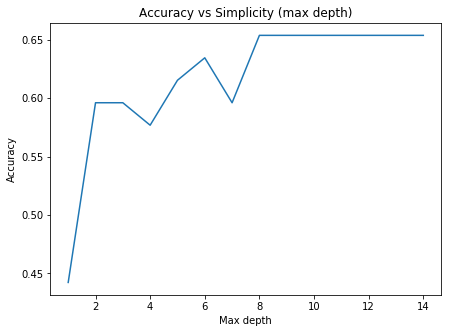

In [20]:
import matplotlib.pylab as plt

# your code here
plt.figure(figsize=(7,5))
plt.plot(range(1,15,1),accuracy)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (max depth)")
plt.show()


Figure 2. This is a plot that shows the change of accuracy when the max depth changes. We can see that at the depth of 8, the accuracy reaches its maximum value and does not change anymore.

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [21]:
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(1,2,50)
param_grid = {'max_depth':thresholds}

gs = GridSearchCV(DecisionTreeClassifier(random_state = 2019), param_grid, cv=6)
model = gs.fit(X_train,y_train)

print("best_parms:{0}\n out of sample:{1}".format(model.best_params_, model.score(X_test, y_test)))


best_parms:{'max_depth': 2.0}
 out of sample:0.596153846154


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [22]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth = 2, random_state = 2019)
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=data.iloc[:,1:-1].columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print thestring

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 4141.0, samples = 78, value = [19, 23, 19, 17], class = high", fillcolor="#47e53911"] ;
1 [label="SustAccImprSanUrb <= 0.644, samples = 38, value = [18, 18, 1, 1], class = awful", fillcolor="#e5813900"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 24, value = [18, 5, 0, 1], class = awful", fillcolor="#e58139ae"] ;
1 -> 2 ;
3 [label="samples = 14, value = [0, 13, 1, 0], class = high", fillcolor="#47e539eb"] ;
1 -> 3 ;
4 [label="GDPPCptaIntDol <= 8727.5, samples = 40, value = [1, 5, 18, 16], class = low", fillcolor="#399de515"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 24, value = [0, 5, 4, 15], class = medium", fillcolor="#d739e586"] ;
4 -> 5 ;
6 [label="samples = 16, value = [1, 0, 14, 1], class = low", fillcolor="#399de5dd"] ;
4 -> 6 ;
}


![result](./webgraphviz.png)

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

thresholds = np.linspace(1,2,50)
param_grid = {'max_depth':thresholds}

rfc = GridSearchCV(RandomForestClassifier(max_depth=8,random_state=2018), param_grid, cv=6)
gs = rfc.fit(X_train,y_train)

print("best_parms:{0}\nout of sample accuracy:{1}".format(gs.best_params_, gs.score(X_test,y_test)))



best_parms:{'max_depth': 2.0}
out of sample accuracy:0.653846153846


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

**As for accuracy, there is a difference between the two methods (random forest performs better, out of sample accuracy = 0.654 while decision tree has 0.596). The difference is not that big might bacause the data in this case is not big/complex enought to show the accuracy difference. From the interpretability side, it is clear that decision tree is a better method to show how the model works (visualizable flow path and much easier to interpret) while it is hard to tell the random forest principles. **